$J^{n+1}_{ij} \approx J^{n}_{ij} + \alpha (\left\langle s_i s_j \right\rangle^{f_\epsilon} -  \epsilon J^{n}_{ij} -\lambda J^{n}_{ij}$

In [1]:
from Erasure_machine import fit
from Sampler import simulater
from Spin_calculator import calculator

import matplotlib.pyplot as plt
import numpy as np
import torch
import time

## model : 2D-Ising model

In [2]:
T = np.arange(3.5,1.0,-0.1)
eq_T = 1000
K = 5
M = 1000

N = 25

sampler =  simulater(N, M, T, eq_T, K)
sampler.adjacency_matrix('2D-Ising')

In [3]:
start = time.time()
samples = sampler.MC_Sampling()
np.save('Test_samples/2D_Ising_config_N%d.npy'%N, samples)
print('obtain samples during ', time.time() - start)

obtain samples during  85.19163751602173


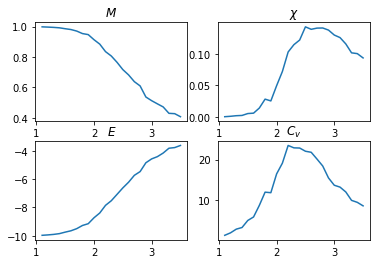

In [5]:
calcul = calculator(samples)
J = sampler.J

M = calcul.magnetization()
plt.subplot(2,2,1)
plt.title('$M$')
plt.plot(T,M)

X = calcul.susceptibility(T)
plt.subplot(2,2,2)
plt.title(r'$\chi$')
plt.plot(T,X)

E = calcul.energy(J)
plt.subplot(2,2,3)
plt.title('$E$')
plt.plot(T,E)

C = calcul.Specific_heat(T, J)
plt.subplot(2,2,4)
plt.title(r'$C_v$')
plt.plot(T,C)
plt.savefig('image/2D_Ising_measurements_N%d.svg'%N)
plt.show()

### inference

In [7]:
solver = fit()

obtain coupling during  0.46637797355651855


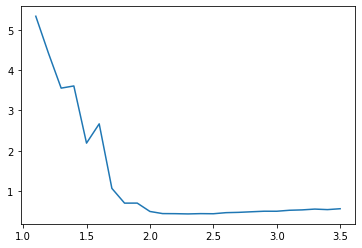

In [9]:
MSE_arr = np.zeros(len(T))
start = time.time()
w_true = solver.J_to_w(sampler.J).to('cuda')

for i,t in enumerate(T):
    config = samples[:,:,i]
    ops = solver.operators(config)
    w_infer = solver.em_gpu(ops)
    MSE_arr[i] = torch.sum((w_infer - w_true)**2) / torch.sum((w_true)**2)
    
print('obtain coupling during ', time.time() - start)

plt.plot(T,MSE_arr)
plt.savefig('image/2D_Ising_EM_N%d.svg'%N)
plt.show()

# SK model

In [2]:
T = np.arange(1.5,0.1,-0.05)
eq_T = 1000
K = 5
M = 1000

N = 25

sampler =  simulater(N, M, T, eq_T, K)
sampler.adjacency_matrix('SK-model')

In [9]:
start = time.time()
samples = sampler.MC_Sampling()
np.save('Test_samples/SK_model_config_N%d.npy'%N, samples)
print('obtain samples during ', time.time() - start)

obtain samples during  89.1060950756073


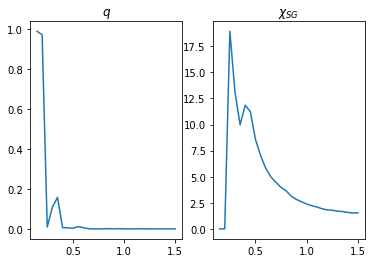

In [10]:
calcul = calculator(samples)
J = sampler.J

q = calcul.Edward_Anderson()
plt.subplot(1,2,1)
plt.title('$q$')
plt.plot(T,q)

X = calcul.SG_susceptibility()
plt.subplot(1,2,2)
plt.title(r'$\chi_{SG}$')
plt.plot(T,X)
plt.savefig('image/SK_model_measurements_N%d.svg'%N)
plt.show()

### inference

In [6]:
solver = fit()

obtain coupling during  0.5113940238952637


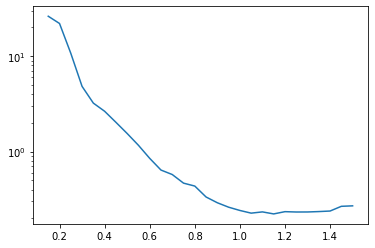

In [8]:
MSE_arr = np.zeros(len(T))
start = time.time()
w_true = solver.J_to_w(sampler.J).to('cuda')

for i,t in enumerate(T):
    config = samples[:,:,i]
    ops = solver.operators(config)
    w_infer = solver.em_gpu(ops)
    MSE_arr[i] = torch.sum((w_infer - w_true)**2) / torch.sum((w_true)**2)
    
print('obtain coupling during ', time.time() - start)

plt.plot(T,MSE_arr)
plt.yscale('log')
plt.savefig('image/SK_model_EM_N%d.svg'%N)
plt.show()